In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\Arshiyan A Shaikh\Desktop\jupyernotebook\Kagel House Price\data.csv")

In [5]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [13]:
def plot_relation(var1,var2="price"):
    plt.scatter(df[var1],df[var2])
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.show()

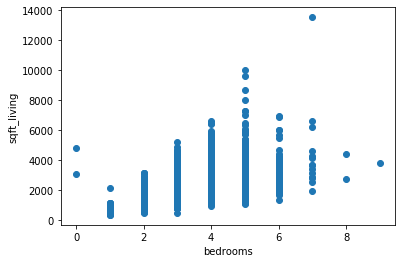

In [15]:
plot_relation("bedrooms","sqft_living")

In [20]:
col_name=list(df.columns.values)
type(col_name)

list

In [40]:
city_price=df[["city","price"]]

In [47]:
city_mean=city_price.groupby("city").mean()
city_mean.reset_index(inplace=True,drop=False)
city_mean.sort_values("price",ascending=False,inplace=True)
city_mean.reset_index(inplace=True,drop=True)

In [51]:
top_16=list(city_mean.loc[:16,"city"])

In [56]:
for i in df.index:
    if df.loc[i,"city"] not in top_16:
        df.loc[i,"city"]="Others"

In [58]:
city_onhot=pd.get_dummies(df["city"])

In [64]:
df2=pd.concat([df,city_onhot],axis=1)

In [71]:
for i in df2.columns:
    if df2[i].dtypes=="O":
        del df2[i]

In [73]:
#Creating Machine learing Model

In [75]:
from sklearn.model_selection import train_test_split

In [128]:
train,test=train_test_split(df2,test_size=0.2,random_state=3)

In [129]:
y_train=train["price"]
x_train=train.iloc[:,1:]
y_test=test["price"]
x_test=test.iloc[:,1:]

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
model=LinearRegression(fit_intercept=False)

In [132]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [133]:
for i in zip(x_train.columns,model.coef_):
    print(i)

('bedrooms', -46712.45896419763)
('bathrooms', 36393.56114855711)
('sqft_living', 153.81432544066521)
('sqft_lot', -0.11239260721189591)
('floors', 5168.347124745763)
('waterfront', 471004.3471781269)
('view', 41528.01554295744)
('condition', 23671.01868888337)
('sqft_above', 113.52617334452415)
('sqft_basement', 40.2880970455316)
('yr_built', -1280.6534005601586)
('yr_renovated', 6.107201890464646)
('Beaux Arts Village', -1.7462298274040222e-08)
('Bellevue', 2686391.3368106154)
('Clyde Hill', 3071507.39993606)
('Fall City', 2474174.805252285)
('Issaquah', 2494893.1372771924)
('Kirkland', 2582510.572460697)
('Medina', 3721225.530506038)
('Mercer Island', 2761666.8875275925)
('Newcastle', 2495039.668410168)
('Others', 2345132.237661574)
('Preston', 2391486.7085253475)
('Redmond', 2553847.0508797434)
('Sammamish', 2465507.4995790645)
('Seattle', 2587776.9569963287)
('Snoqualmie', 2343292.615668691)
('Snoqualmie Pass', 2513159.8105082624)
('Woodinville', 2452099.4047816014)
('Yarrow Point

In [134]:
from sklearn.metrics import mean_squared_error

In [135]:
#training data
np.sqrt(mean_squared_error(y_train,model.predict(x_train)))

299148.6263663393

In [137]:
np.sqrt(mean_squared_error(y_test,model.predict(x_test)))

908782.3780564276

In [161]:
train_rmse=[]
test_rmse=[]
prediction=pd.DataFrame()
range1=90
for i in range(1,range1):
    train,test=train_test_split(df2,test_size=0.2,random_state=i)
    y_train=train["price"]
    x_train=train.iloc[:,1:]
    y_test=test["price"]
    x_test=test.iloc[:,1:]
    model=LinearRegression(fit_intercept=True)
    model.fit(x_train,y_train)
    train_rms=np.sqrt(mean_squared_error(y_train,model.predict(x_train)))
    train_rmse.append(train_rms)
    test_rms=np.sqrt(mean_squared_error(y_test,model.predict(x_test)))
    test_rmse.append(test_rms)
    prediction["iter"+str(i)]=model.predict(x_test)

In [162]:
prediction["mean"]=prediction.mean(axis=1)
avg_erro=np.sqrt(mean_squared_error(y_test,prediction["mean"]))

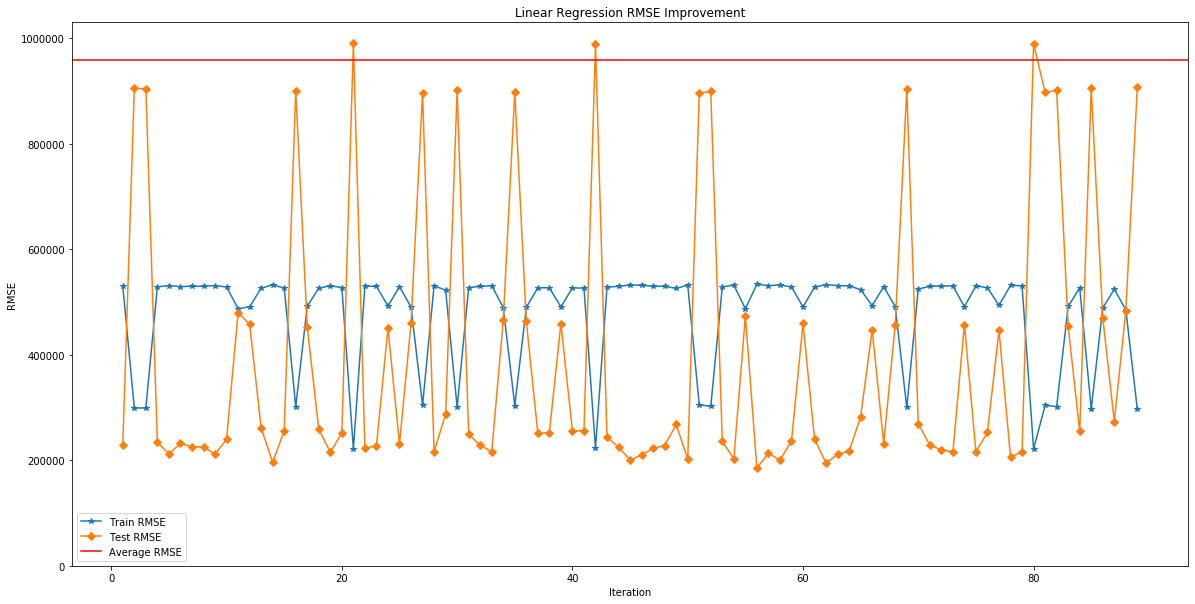

In [163]:
plt.figure(figsize=(20,10))
plt.plot(range(1,range1),train_rmse,label="Train RMSE",marker="*")
plt.plot(range(1,range1),test_rmse,label="Test RMSE",marker="D")
plt.axhline(y=avg_erro,color='r',label="Average RMSE")
plt.legend(loc="best")
plt.xlabel("Iteration")
plt.ylabel("RMSE")
plt.title("Linear Regression RMSE Improvement")
plt.ylim(0)
plt.show()

375248.02645611484

In [153]:
prediction

,iter1,iter2,iter3,iter4,iter5,iter6,iter7,iter8,iter9,iter10,...,iter91,iter92,iter93,iter94,iter95,iter96,iter97,iter98,iter99,mean
0,3.396578e+05,2.225842e+05,9.000975e+05,4.111093e+05,4.698162e+05,6.637065e+05,4.527423e+05,4.460654e+05,8.285530e+05,6.670031e+05,...,3.828848e+05,3.109876e+05,3.001812e+05,7.180942e+05,5.391459e+05,1.792027e+05,2.972997e+05,1.012966e+06,1.903069e+05,561556.958460
1,8.724951e+05,2.234411e+05,7.073660e+05,7.273218e+05,1.990231e+05,5.265805e+05,7.516267e+05,3.194075e+05,4.098199e+05,9.598212e+05,...,6.366944e+05,5.843931e+05,3.954004e+05,4.450925e+05,5.898745e+05,2.153352e+05,3.967434e+05,4.194930e+05,7.879434e+05,544157.427846
2,3.674763e+05,7.294991e+05,7.415555e+05,2.712886e+05,4.359455e+05,7.368016e+05,3.802604e+05,5.970874e+05,4.527613e+05,1.001743e+06,...,5.579350e+05,3.389293e+05,1.062360e+05,2.975020e+05,7.221603e+05,6.455860e+05,4.366185e+05,2.173621e+05,7.279177e+05,529345.678356
3,5.434174e+05,3.527098e+05,5.498573e+05,2.833456e+05,1.770314e+05,4.590329e+05,6.113948e+05,4.880081e+05,5.436041e+05,6.786200e+05,...,5.454057e+05,5.237299e+05,6.202855e+05,3.531294e+05,2.209652e+05,1.189304e+06,1.715954e+05,2.984772e+05,7.838825e+05,545472.165818
4,8.238113e+05,5.275607e+05,5.893559e+05,1.025860e+06,3.986326e+05,4.367154e+05,8.663776e+05,3.734424e+05,5.483388e+05,7.120354e+05,...,4.911420e+05,3.609206e+05,5.040490e+05,5.331689e+05,3.566312e+05,3.789089e+05,5.021354e+05,6.326329e+05,4.805213e+05,489632.234011
5,4.721732e+05,2.554327e+05,1.057542e+06,3.888249e+05,4.154604e+05,7.595646e+05,1.127944e+05,7.124680e+05,1.610255e+05,4.034290e+05,...,6.826338e+05,3.917893e+05,3.933321e+05,3.832561e+05,3.575626e+05,4.764757e+05,8.818326e+05,4.113002e+05,4.522032e+05,534200.379242
6,3.815533e+05,4.303983e+05,5.337151e+05,1.262139e+05,6.427416e+05,7.832171e+05,7.501310e+05,5.183724e+05,1.874673e+05,4.465287e+05,...,3.229101e+05,3.455567e+05,7.608669e+05,3.929131e+05,1.073494e+05,6.844590e+05,6.688840e+05,1.252028e+06,5.438993e+05,555178.253480
7,3.883119e+05,6.127649e+05,2.488515e+05,3.381042e+05,5.339502e+05,2.509773e+05,7.796269e+05,7.093933e+05,4.494488e+05,1.597182e+05,...,5.919035e+05,9.149485e+05,3.318554e+05,7.368557e+05,2.452216e+05,8.916467e+05,1.498439e+05,7.269742e+05,4.205812e+05,524050.455730
8,3.294666e+05,6.199873e+05,7.244432e+05,4.899054e+05,2.141731e+05,1.660400e+06,5.692425e+05,3.724371e+05,4.366776e+05,3.873018e+05,...,5.263325e+05,4.341792e+05,5.251693e+05,8.525548e+05,4.531068e+05,4.479042e+05,6.760404e+05,4.920717e+05,6.026159e+05,490357.339141
9,4.898399e+05,1.713103e+05,5.190284e+05,4.330195e+05,6.554428e+05,1.594344e+05,1.090922e+06,6.313515e+05,4.265797e+05,7.577666e+05,...,1.481170e+06,2.955579e+05,4.823867e+05,8.098719e+05,4.875667e+05,3.734766e+05,4.815470e+05,9.243843e+05,5.390402e+05,557369.397613
